In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trytry/Database.csv
/kaggle/input/trytry/red_cols.csv
/kaggle/input/trytry/final_ct.csv
/kaggle/input/trytry/df_ct.csv


# Importing libraries + Datset + Variable identification and typecasting.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

df = pd.read_csv('/kaggle/input/trytry/final_ct.csv')

df.shape

df.columns

df.dtypes

location = ['Latitude', 'Longitude']
grow_time = [ 'Harvest year', 'Sowing month','Harvesting month']
environmental = ['P', 'E', 'PB', 'Tave']
target = ['Yield of CT']

In [4]:
df

,Latitude,Longitude,Crop,Harvest year,Fertilization CT,N input,Yield of CT,Sowing month,Harvesting month,P,E,PB,Tave,ST
0,48.28,-105.10,wheat.winter,1992,Yes,Yes,2567.0,9,20,395.800000,534.828000,-139.028,5.03333,Loam
1,48.28,-105.10,wheat.winter,1993,Yes,Yes,2405.0,9,20,260.300000,590.273000,-329.973,5.79167,Loam
2,48.28,-105.10,wheat.winter,1994,Yes,Yes,2439.0,9,20,397.300000,555.260000,-157.960,6.86667,Loam
3,32.42,-93.64,soybean,2016,Yes,Yes,3005.0,6,10,511.900005,546.686888,-34.787,26.16000,Loam
4,32.42,-93.64,soybean,2017,Yes,Yes,3062.0,6,10,475.099997,511.402611,-36.303,24.96000,Loam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3927,45.53,17.98,maize,1980,Mix,Mix,4400.0,4,10,584.800000,437.793000,147.007,15.00000,Loam
3928,45.53,17.98,maize,1981,Mix,Mix,5900.0,4,10,524.000000,484.803000,39.197,16.25714,Loam
3929,45.55,18.69,maize,1980,Mix,Mix,12100.0,4,10,533.100000,443.249000,89.851,15.75714,Loam
3930,45.55,18.69,maize,1981,Mix,Mix,6600.0,4,10,507.200000,488.113000,19.087,17.00000,Loam


In [5]:
df.rename(columns={'Yield of CT': 'Yield'}, inplace=True)

In [6]:
df.shape

(3932, 14)

In [7]:
# isolating numerical datatypes
numerical = df.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

Latitude            float64
Longitude           float64
Harvest year          int64
Yield               float64
Sowing month          int64
Harvesting month      int64
P                   float64
E                   float64
PB                  float64
Tave                float64
dtype: object

In [8]:
# Get list of columns excluding 'Yield' and append 'Yield' at the end
columns = [col for col in numerical.columns if col != 'Yield']
columns.append('Yield')
numerical = numerical[columns]

In [9]:
columns

['Latitude',
 'Longitude',
 'Harvest year',
 'Sowing month',
 'Harvesting month',
 'P',
 'E',
 'PB',
 'Tave',
 'Yield']

# Bivariate Analysis 

## 1. Numerical-Numerical



## 1.1 Correlation Matrix

In [10]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,Latitude,Longitude,Harvest year,Sowing month,Harvesting month,P,E,PB,Tave,Yield
Latitude,1.000000,-0.300955,-0.133925,-0.269366,-0.201563,-0.232045,-0.366798,-0.088345,-0.291027,0.063028
Longitude,-0.300955,1.000000,0.462458,0.254257,0.184451,0.004415,-0.136665,0.063451,0.233787,0.119155
Harvest year,-0.133925,0.462458,1.000000,0.124153,0.119469,0.035729,0.015149,0.031375,0.089366,0.263643
Sowing month,-0.269366,0.254257,0.124153,1.000000,0.914266,0.068963,0.276260,-0.045665,-0.015604,-0.241875
Harvesting month,-0.201563,0.184451,0.119469,0.914266,1.000000,0.152427,0.403908,-0.012046,-0.248272,-0.208330
P,-0.232045,0.004415,0.035729,0.068963,0.152427,1.000000,0.339364,0.914536,0.128193,0.060563
E,-0.366798,-0.136665,0.015149,0.276260,0.403908,0.339364,1.000000,-0.070138,0.176123,-0.054763
PB,-0.088345,0.063451,0.031375,-0.045665,-0.012046,0.914536,-0.070138,1.000000,0.060208,0.087774
Tave,-0.291027,0.233787,0.089366,-0.015604,-0.248272,0.128193,0.176123,0.060208,1.000000,-0.016262
Yield,0.063028,0.119155,0.263643,-0.241875,-0.208330,0.060563,-0.054763,0.087774,-0.016262,1.000000


## 1.2 Heatmap
#### Heatmap will allow us to visually figure out the key correlation between variables and filter down the essential variables so that we will have less to deal with during the scatter plots.

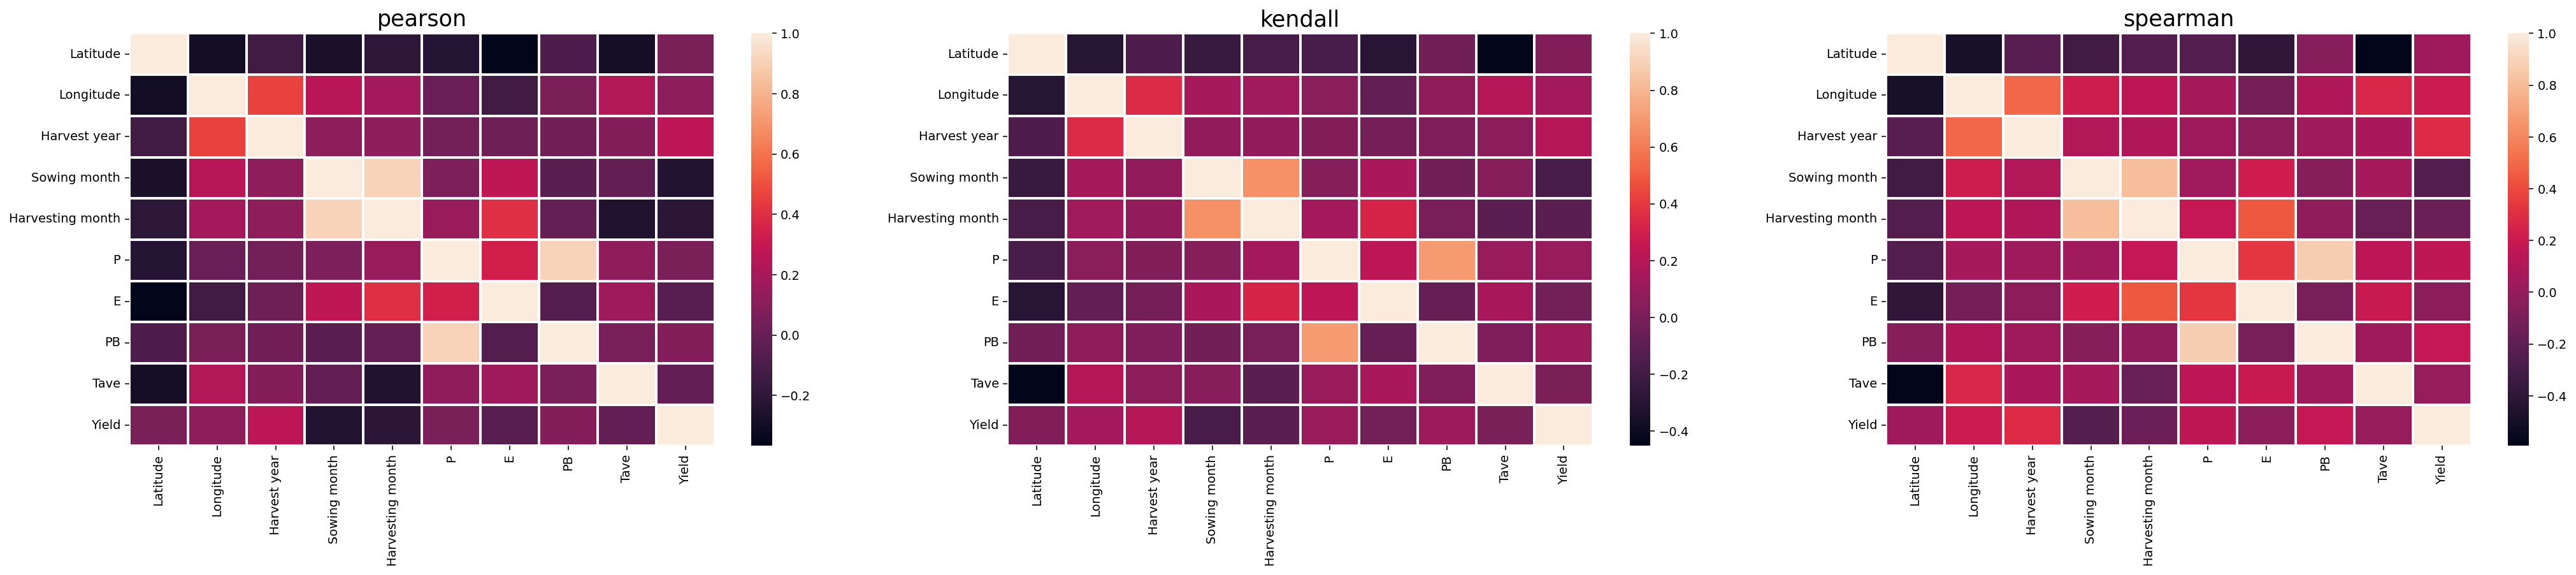

In [11]:
# plotting heatmap usingl all methods for all numerical variables (peason, kendall, spearman)
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

#### The analysis indicates that harvest years and higher longitudes are weakly positively correlated with crop yield, while sowing and harvesting months are weakly negatively correlated. Other factors such as phosphorus (PB), latitude, evapotranspiration (E), and average temperature (Tave) show weaker associations with crop yield.

## 1.3 Scatter Plots
#### Now that we have a bird's eye view of the correlations, let's look over them closely with the help of scatter plots.

<Figure size 896x672 with 0 Axes>

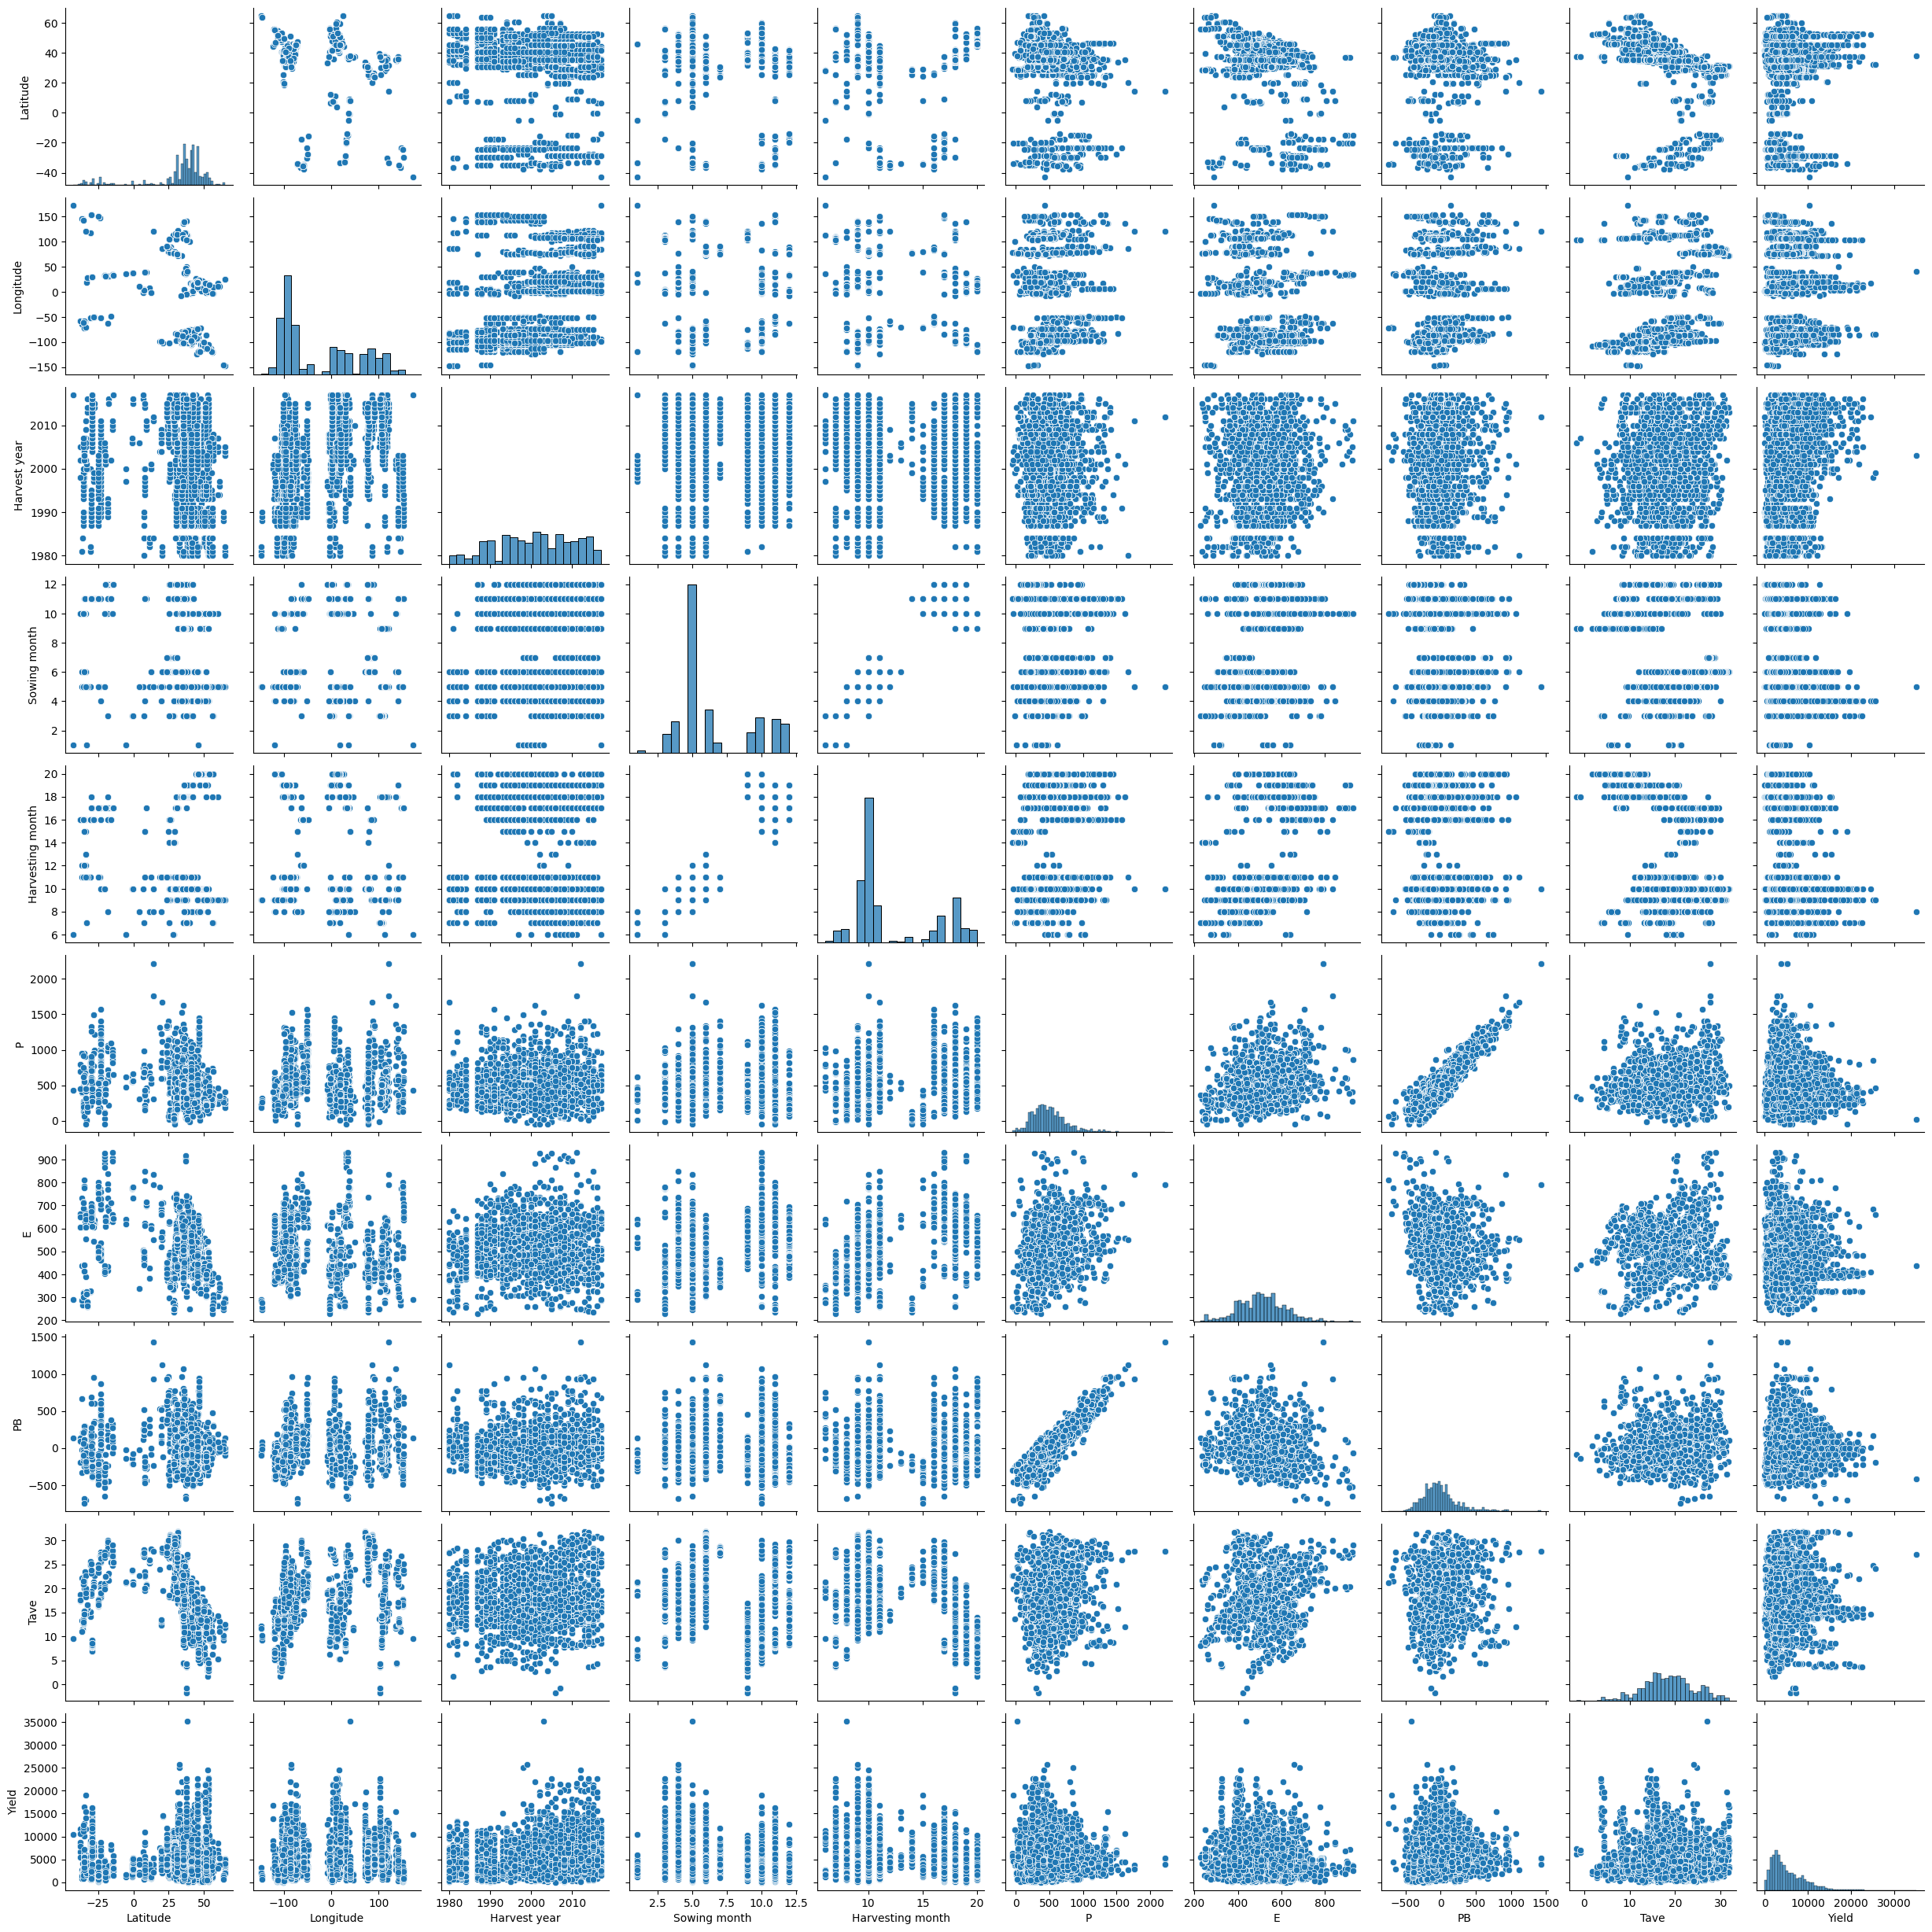

In [27]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore warnings
warnings.filterwarnings("ignore")

# Replace inf values with NaN
numerical.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows containing NaN values
numerical.dropna(inplace=True)

# Plot pairplot
plt.figure(dpi=140)
sns.pairplot(numerical)
plt.show()


## 2. Continuous-Categorical : To plot categorical mean and categorical distribution.

In [13]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  m1, m2 = x1.mean(), x2.mean()
  
  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (20,4), dpi=140)
  
  #barplot
  plt.subplot(1,3,1)
  sns.barplot(x=[str(category),'not {}'.format(category)], y=[m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  # category-wise distribution
  plt.subplot(1,3,2)
  sns.kdeplot(x1, shade= True, color='blue', label = 'churned')
  sns.kdeplot(x2, shade= False, color='green', label = 'not churned', linewidth = 1)
  plt.title('categorical distribution')
    
  # boxplot
  plt.subplot(1,3,3)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

In [14]:
df.columns

Index(['Latitude', 'Longitude', 'Crop', 'Harvest year', 'Fertilization CT ',
       'N input', 'Yield', 'Sowing month', 'Harvesting month', 'P', 'E', 'PB',
       'Tave', 'ST'],
      dtype='object')

## 2.1 Crop Vs Yield

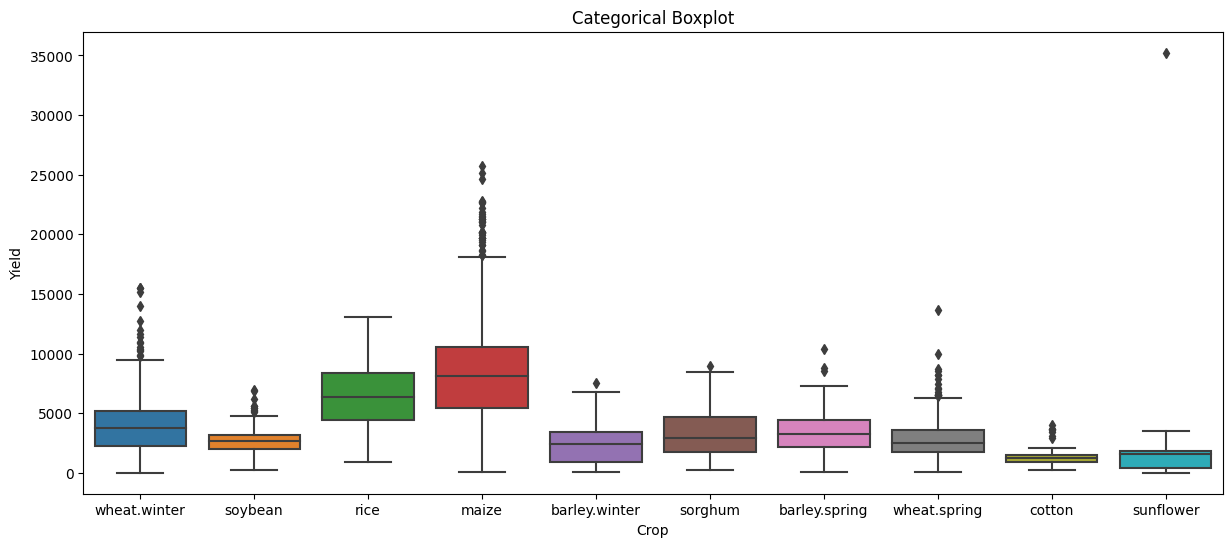

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a wider figure size
plt.figure(figsize=(50, 6))

# Create the subplot
plt.subplot(1, 3, 3)

# Create a copy of the DataFrame to avoid modifying the original data
df_plot = df.copy()


# Create the boxplot with seaborn
sns.boxplot(x='Crop', y='Yield', data=df_plot)

# Add title
plt.title('Categorical Boxplot')

# Show the plot
plt.show()


## 2.2 N(Nitrogen) Input Vs Yield

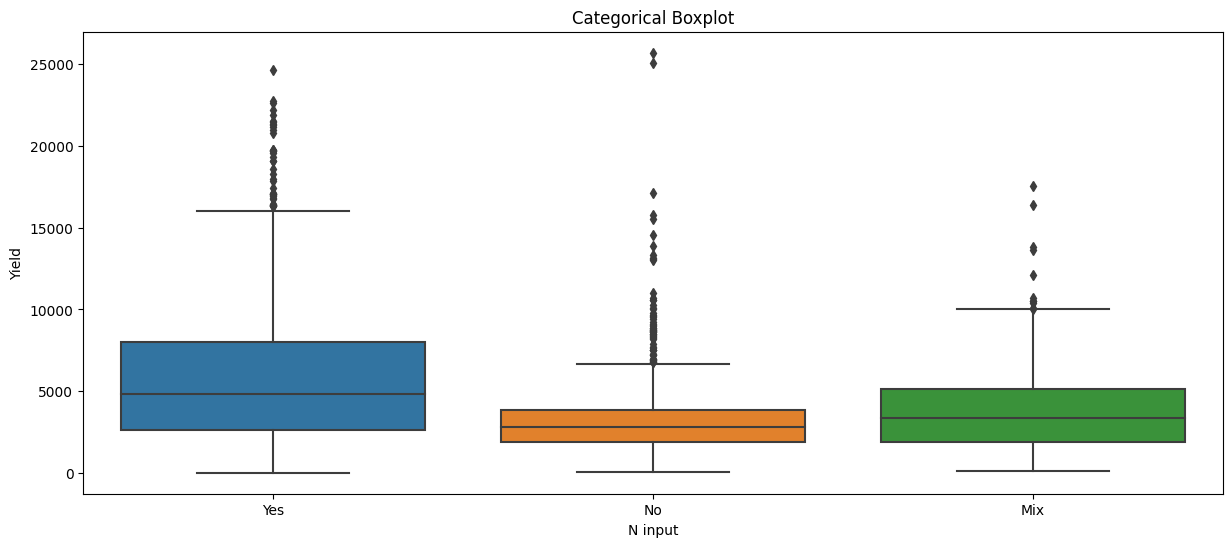

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a wider figure size
plt.figure(figsize=(50, 6))

# Create the subplot
plt.subplot(1, 3, 3)

# Create a copy of the DataFrame to avoid modifying the original data
df_plot = df.copy()


# Create the boxplot with seaborn
sns.boxplot(x='N input', y='Yield', data=df_plot)

# Add title
plt.title('Categorical Boxplot')

# Show the plot
plt.show()


## 2.3 Fertilization CT Vs Yield

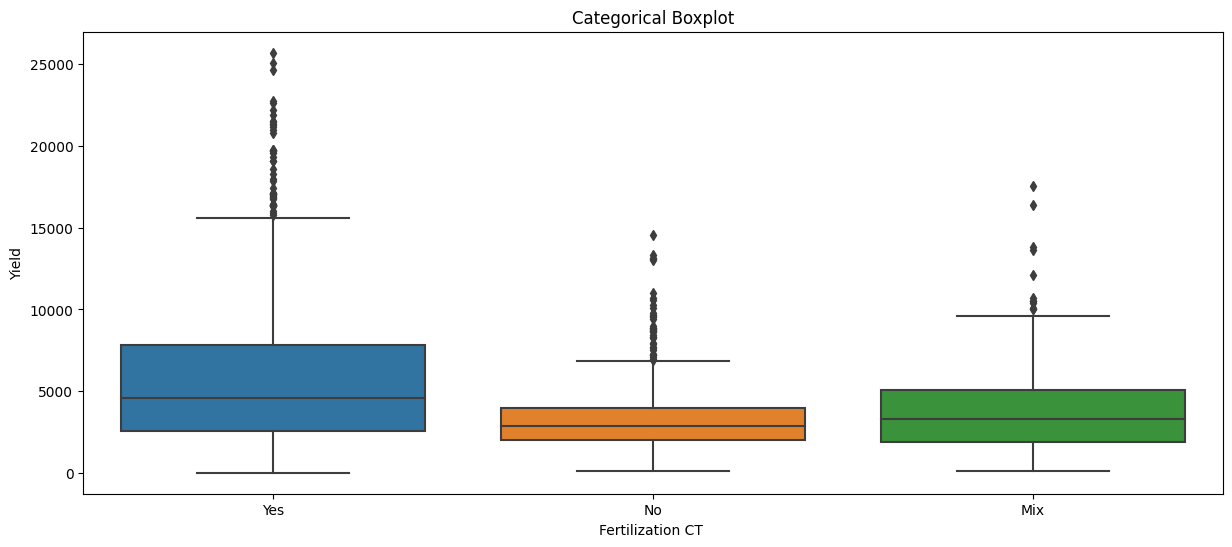

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a wider figure size
plt.figure(figsize=(50, 6))

# Create the subplot
plt.subplot(1, 3, 3)

# Create a copy of the DataFrame to avoid modifying the original data
df_plot = df.copy()


# Create the boxplot with seaborn
sns.boxplot(x='Fertilization CT ', y='Yield', data=df_plot)

# Add title
plt.title('Categorical Boxplot')

# Show the plot
plt.show()


## 2.4 Soil Type (ST) Vs Yield

In [18]:
df['ST'].unique()

array(['Loam', 'Clay loam', 'Sandy loam', 'Silt loam', 'Clay',
       'Sandy clay loam', 'Sandy clay'], dtype=object)

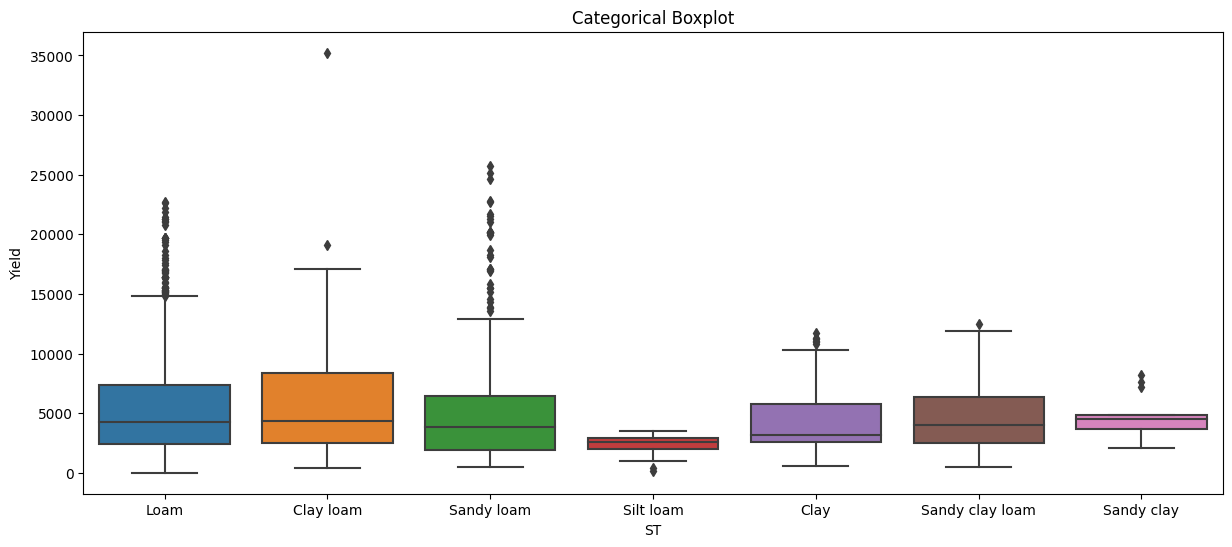

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a wider figure size
plt.figure(figsize=(50, 6))

# Create the subplot
plt.subplot(1, 3, 3)

# Create a copy of the DataFrame to avoid modifying the original data
df_plot = df.copy()


# Create the boxplot with seaborn
sns.boxplot(x='ST', y='Yield', data=df_plot)

# Add title
plt.title('Categorical Boxplot')

# Show the plot
plt.show()


## 2.5 Sowing Month Vs Yield

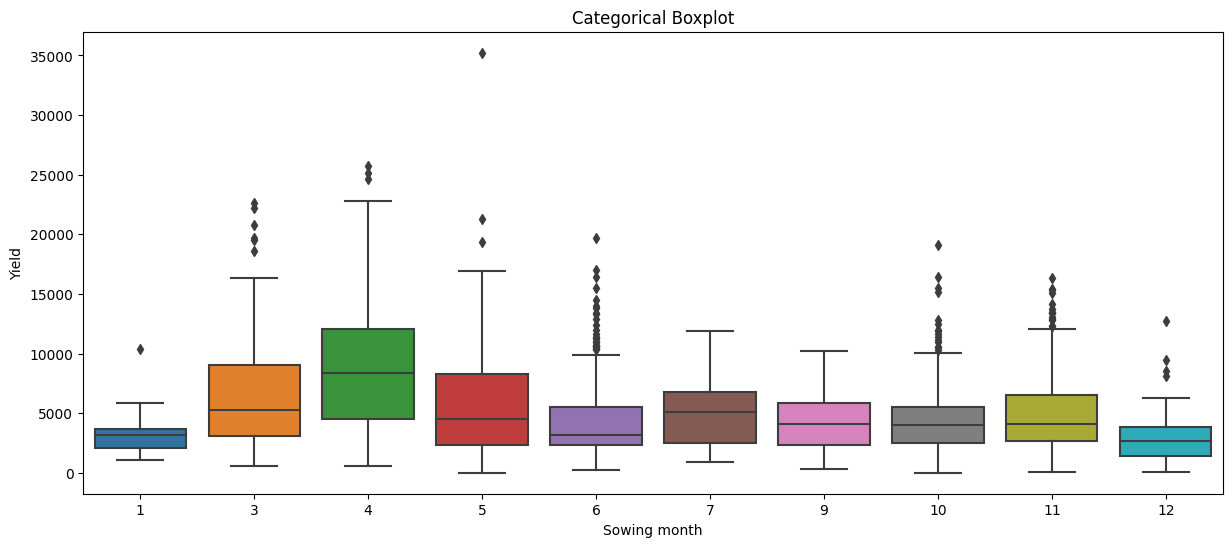

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a wider figure size
plt.figure(figsize=(50, 6))

# Create the subplot
plt.subplot(1, 3, 3)

# Create a copy of the DataFrame to avoid modifying the original data
df_plot = df.copy()


# Create the boxplot with seaborn
sns.boxplot(x='Sowing month', y='Yield', data=df_plot)

# Add title
plt.title('Categorical Boxplot')

# Show the plot
plt.show()


## 2.6 Harvesting Month Vs Yield

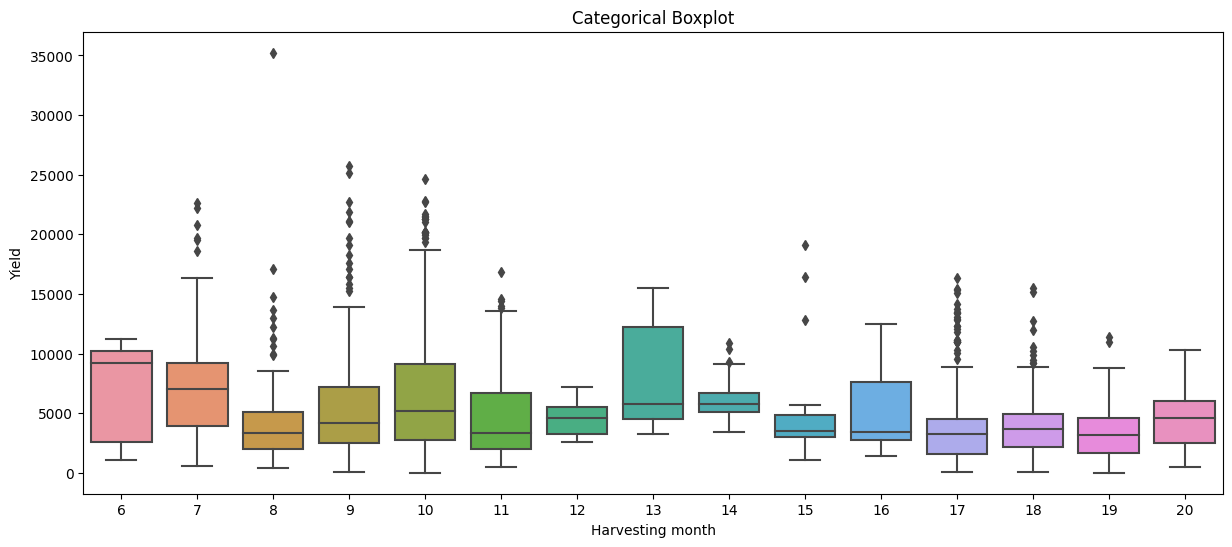

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a wider figure size
plt.figure(figsize=(50, 6))

# Create the subplot
plt.subplot(1, 3, 3)

# Create a copy of the DataFrame to avoid modifying the original data
df_plot = df.copy()


# Create the boxplot with seaborn
sns.boxplot(x='Harvesting month', y='Yield', data=df_plot)

# Add title
plt.title('Categorical Boxplot')

# Show the plot
plt.show()


# Multivariate Analysis

## Crops Vs Soil Type Vs Yield

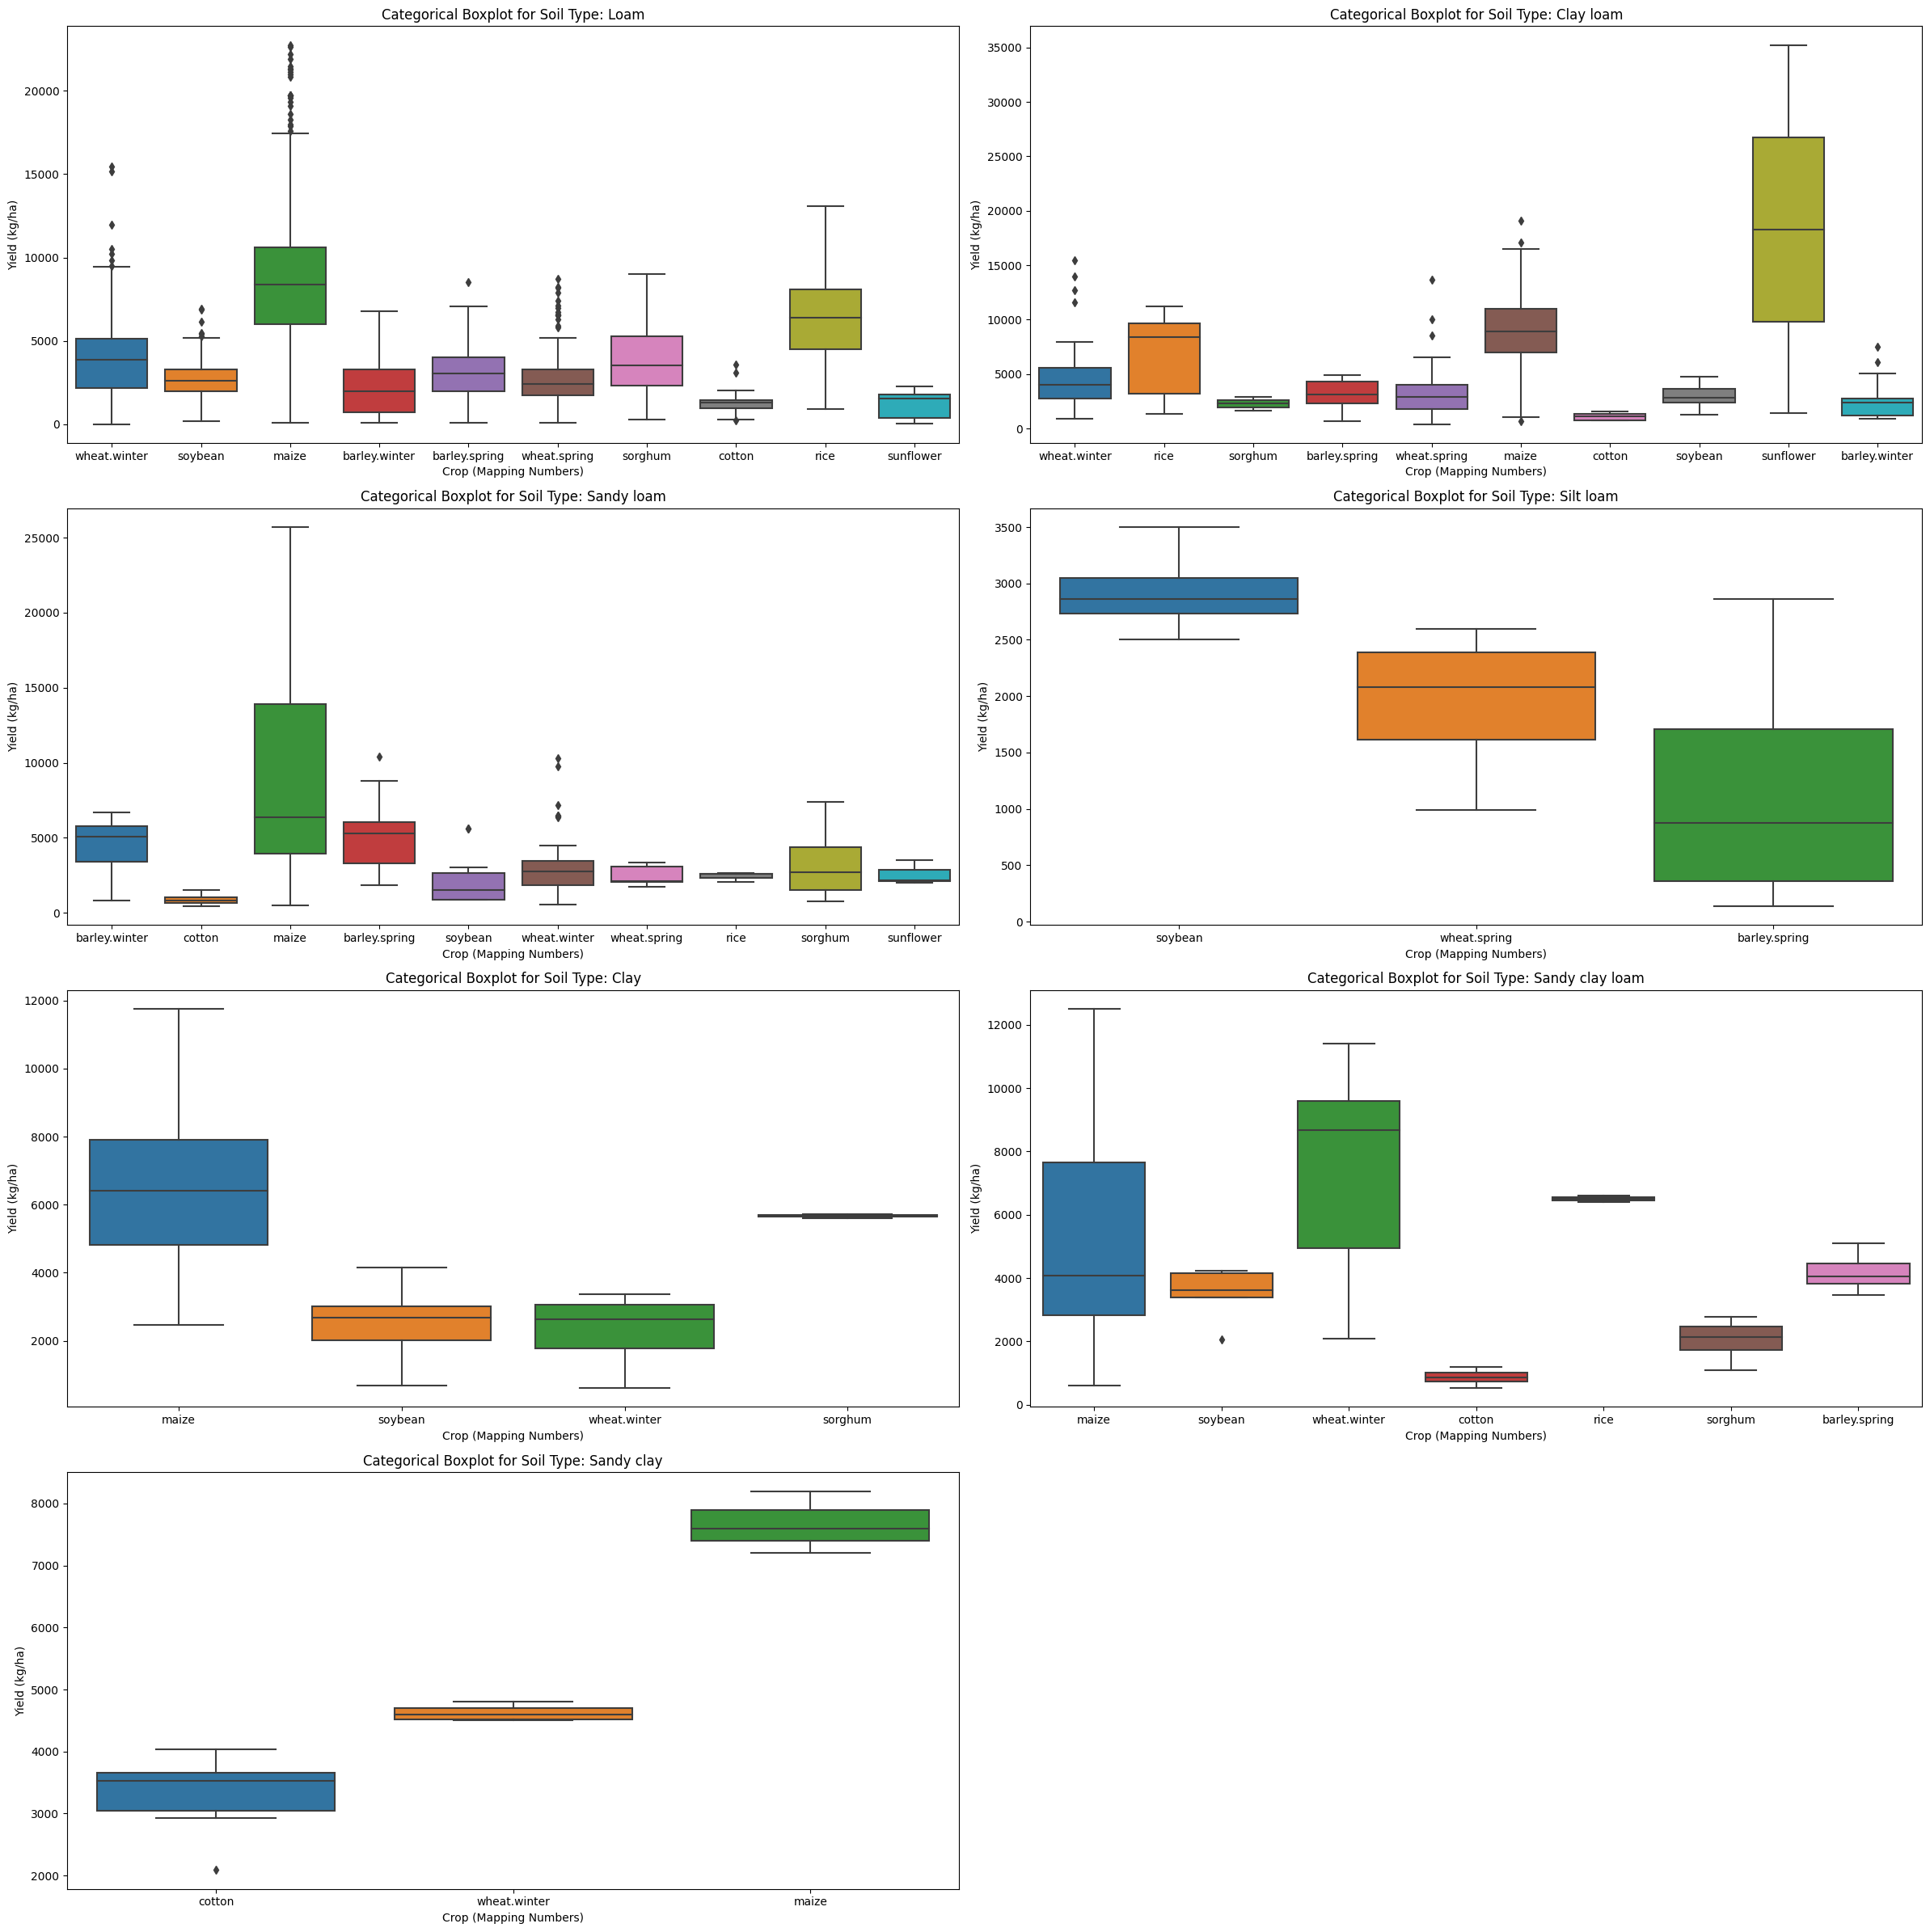

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample list of soil types
soil_types = ['Loam', 'Clay loam', 'Sandy loam', 'Silt loam', 'Clay', 'Sandy clay loam', 'Sandy clay']

# Calculate the number of rows and columns needed
num_rows = (len(soil_types) + 1) // 2
num_cols = min(len(soil_types), 2)

# Set the figure size according to the number of rows and columns
plt.figure(figsize=(12 * num_cols, 6 * num_rows))

# Iterate over each soil type
for i, soil_type in enumerate(soil_types, start=1):
    # Create the subplot for the boxplot
    plt.subplot(num_rows, num_cols, i)
    
    # Filter the DataFrame for the current soil type
    df_soil = df[df['ST'] == soil_type].copy()

    # Check if the subset of data is empty
    if not df_soil.empty:
        # Create the boxplot with seaborn
        sns.boxplot(x='Crop', y='Yield', data=df_soil)

        # Add title and labels for the boxplot
        plt.title(f'Categorical Boxplot for Soil Type: {soil_type}')
        plt.xlabel('Crop (Mapping Numbers)')
        plt.ylabel('Yield (kg/ha)')
    else:
        # If the subset of data is empty, display a message
        plt.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


# Mutual Information
#### Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships.The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. 

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression

# Copy the dataframe
X = df.copy()
y = X.pop("Yield")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    le = LabelEncoder()
    X[colname] = le.fit_transform(X[colname])

# Calculate mutual information scores
if y.dtype == 'float64':  # If the target variable is continuous
    mi_scores = mutual_info_regression(X, y)
else:  # If the target variable is categorical
    mi_scores = mutual_info_classif(X, y)

# Display the results
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
print(mi_scores)


Crop                 0.440235
Longitude            0.399344
Latitude             0.391662
Tave                 0.281440
E                    0.230182
PB                   0.222502
P                    0.191080
Harvest year         0.187626
Harvesting month     0.168453
Sowing month         0.148527
N input              0.061698
ST                   0.060577
Fertilization CT     0.043985
dtype: float64


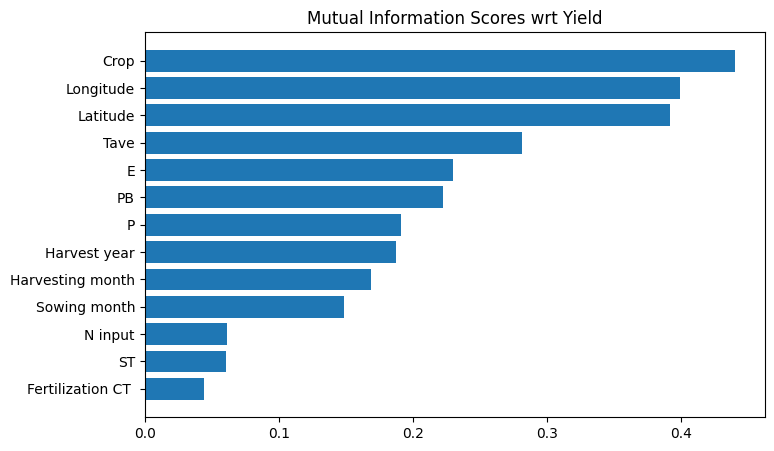

In [24]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores wrt Yield")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

### Inferences :
#### We note that Crop, Longitude and Latitude have stronger relationship with Yield.